In [1]:
import numpy as np
from pymc3 import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
x = np.arange(0,900,25)

# Parameters for tanh
y_intercept = 0.1
s_amp = .5
x_coef = 1/50
x_offset = 8.5

#Sigmoid function 
sigmoid = lambda x, amp, coef, offset,intercept: intercept + amp*( 1/(1+np.exp(-x*coef + offset)) )
s_true = sigmoid(x = x, amp = s_amp, coef = x_coef, offset = x_offset, intercept = y_intercept)

# add noise to the data points
noise = np.random.normal(size=len(x)) * .04 
s = s_true + noise 
s_error = np.ones_like(s_true)*0.05*s.max()



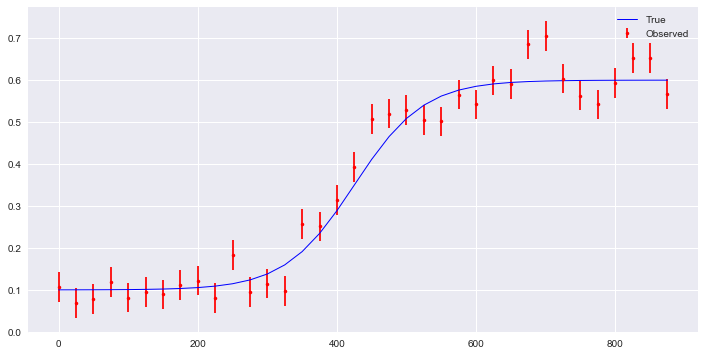

In [11]:
plt.figure(figsize=(12,6))
plt.plot(x,s_true,'b', marker='None', ls='-', lw=1, label='True')
plt.errorbar(x,s,yerr=s_error, color='r', marker='.', ls='None', label='Observed')
plt.legend();

In [4]:
with Model() as model3:
    intercept = Uniform('intercept', 0.05, 0.4)
    amp = Uniform('amp', 0, 1)
    coef = Uniform('coef', 0,1)
    offset = Uniform('offset', 0, 10, testval= 8.5)
    tau = Uniform('tau', 0, 1000)


    sigmoid=Deterministic('sigmoid', intercept + amp*( 1/(1+np.exp(-x*coef + offset)) ) )

    y =Normal('y', mu=sigmoid, tau=tau, observed=s)

  
    trace=sample(2000, tune = 1000)



Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 16.218:   5%|▌         | 10803/200000 [00:02<00:35, 5345.22it/s]
Convergence archived at 10900
Interrupted at 10,900 [5%]: Average Loss = 316.88
100%|██████████| 3000/3000 [01:38<00:00, 30.34it/s]


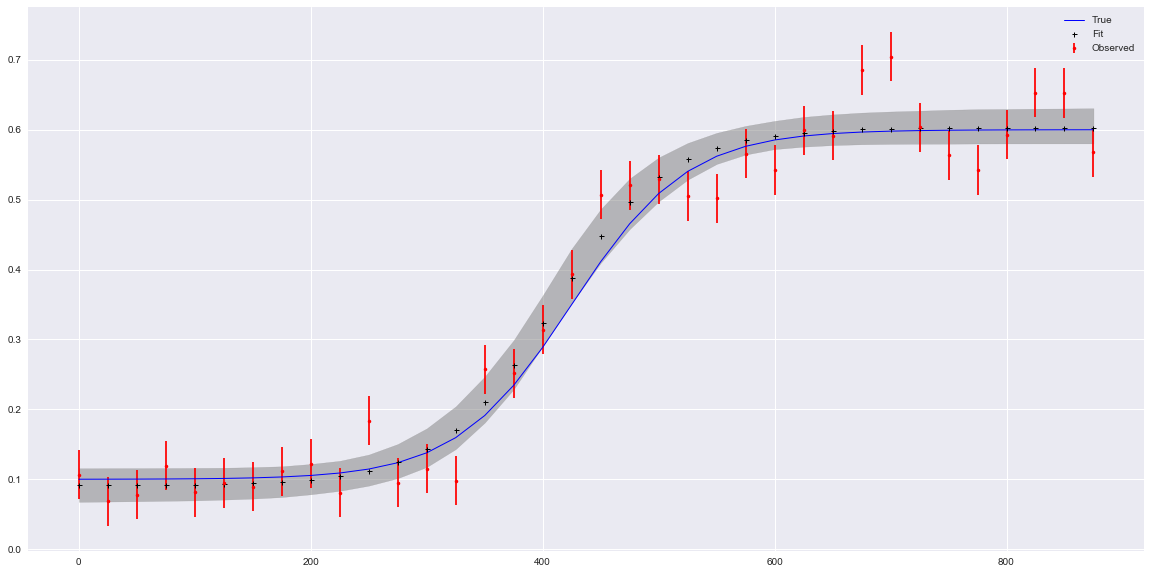

In [10]:
# extract and plot results
plt.figure(figsize=(20,10))
y_min = np.percentile(trace.sigmoid,2.5,axis=0)
y_max = np.percentile(trace.sigmoid,97.5,axis=0)
y_fit = np.percentile(trace.sigmoid,50,axis=0)
plt.plot(x,s_true,'b', marker='None', ls='-', lw=1, label='True')
plt.errorbar(x,s,yerr=s_error, color='r', marker='.', ls='None', label='Observed')
plt.plot(x,y_fit,'k', marker='+', ls='None', ms=5, mew=1, label='Fit')
plt.fill_between(x, y_min, y_max, color='0.5', alpha=0.5)
plt.legend();

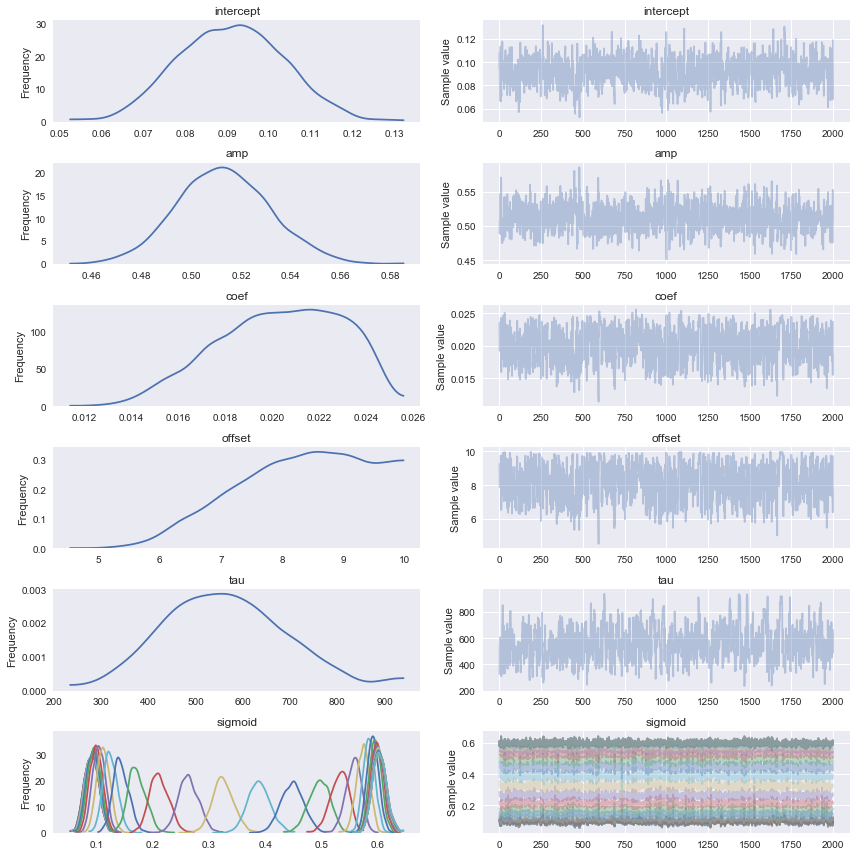

In [6]:
traceplot(trace)
plt.tight_layout();

In [7]:
summary(trace)


intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.091            0.013            0.000            [0.067, 0.115]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.067          0.082          0.091          0.100          0.116


amp:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.513            0.019            0.001            [0.478, 0.551]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.477          0.500          0.512          0.525          0.550


coef:

  Mean             SD               MC Error         95% HPD interval
  ------------------------

https://stackoverflow.com/questions/24804298/fit-a-non-linear-function-to-data-observations-with-pymcmc-pymc